# Spatial analysis with GeoDataframes
With spatial data stored as a geodataframe, we can run a number of analyses, both tabular, using Pandas operations, and spatial, using Geopandas operations. This notebook wades gently into the world of GeoPandas and also serves as a review of several Pandas operations. 

Specifically we examine the following:
* Reading & writing shapefiles into a GeoPandas dataFrame
* Reprojecting data using GeoPandas
* Exploring the GeoPandas dataFrame
 * Exposing the number of features 
 * Revealing the data types of each column 
 * Exploring the `geometry` data type
* Quick view of plotting in GeoPandas
* Quick view of geoprocessing in GeoPandas

### 1. Import the package and enable inline plots

In [1]:
#import the package
import geopandas as gpd

#enable plots to appear in the notebook
%matplotlib inline

---
<h2><font color='red'>► FIX REQUIRED ◄</font></h2>

*You need to run this code block to fix an issue with the `pyproj` module used by GeoPandas.*

For more on the issue see: 
https://github.com/geopandas/geopandas/issues/830

#Fix issue with pyproj 
import sys, os
pythonPath = sys.executable
pythonFolder = os.path.dirname(pythonPath)
shareFolder = os.path.join(pythonFolder,'Library','share')
os.environ["PROJ_LIB"] = shareFolder

---
### 2. Read a shapefile into a _GeoDataframe_
GeoPandas can read shapefiles directly. Behind the scenes, this operation is using the `GDAL` package which contains the binaries capable of understanding geospatial data, the `fiona` package, which allows Python to interact nicely with `GDAL` libraries, and the `shapely` package which has functions for operating with feature classes in a Pythonic way. GeoPandas coordinate reference systems can use the "European Petroleum Survey Group" (EPSG) codes as shorthand for various standard systems. 

Complete documentation on the GeoDataframe is here: http://geopandas.org/data_structures.html#geodataframe

In [2]:
#read in the HUC12.shp feature class
gdf = gpd.read_file('./Data/12Digit_HUC_Subwatersheds.shp')

### 3. Explore properties of the GeoDataframe
Here we explore various properties of our GeoDataframe. Note that all the operations that apply to a Pandas dataframe also apply to geodataframes... 

In [3]:
#How many features and attributes in the dataset?
gdf.shape

(1767, 13)

In [4]:
#show information on each column in the geodataframe
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         1767 non-null   int64   
 1   HUC_8       1767 non-null   object  
 2   HUC_10      1767 non-null   object  
 3   HUC_12      1767 non-null   object  
 4   ACRES       1767 non-null   int64   
 5   HU_10_NAME  1767 non-null   object  
 6   HU_12_NAME  1767 non-null   object  
 7   META_ID     1767 non-null   object  
 8   STATES      1767 non-null   object  
 9   Basin       1767 non-null   object  
 10  Dig_8       1767 non-null   int64   
 11  DWQ_Basin   1767 non-null   object  
 12  geometry    1767 non-null   geometry
dtypes: geometry(1), int64(3), object(9)
memory usage: 179.6+ KB


In [5]:
#Quick summary stats of the dataset
gdf.describe()

,FID,ACRES,Dig_8
count,1767.00000,1767.000000,1.767000e+03
mean,884.00000,20710.693831,3.410937e+06
std,510.23328,10779.120670,9.817839e+05
min,1.00000,2532.000000,3.010102e+06
25%,442.50000,14368.500000,3.020105e+06
50%,884.00000,19664.000000,3.030005e+06
75%,1325.50000,25508.000000,3.040206e+06
max,1767.00000,253688.000000,6.020003e+06


In [6]:
#examine the attributes for the first feature
gdf.iloc[0]

FID                                                           1
HUC_8                                                  03040208
HUC_10                                               0304020802
HUC_12                                             030402080205
ACRES                                                      7321
HU_10_NAME                                      Shallotte River
HU_12_NAME                                Holden Beach-Long Bay
META_ID                                                    NC01
STATES                                                       NC
Basin                                                       LBR
Dig_8                                                   3040208
DWQ_Basin                                                Lumber
geometry      (POLYGON ((-78.3872405238257 33.8981038497261,...
Name: 0, dtype: object

In [7]:
#What coordinate reference system is used? Check http://epsg.io for what this code is
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

→ If the crs returns an 'epsg' code you can generate a URL to look it up...

In [8]:
gdf.crs.to_epsg()

4326

In [9]:
#Get the epsg code from the crs
epsg = gdf.crs.to_epsg()
#Generate and print the URL, which you can click on...
print("http://epsg.io/{}".format(epsg))

http://epsg.io/4326


In [10]:
#show the geometry type(s) in this geodataframe
gdf.type.unique()

array(['MultiPolygon', 'Polygon'], dtype=object)

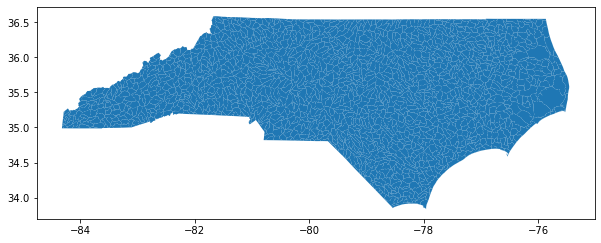

In [11]:
#Simple plot
gdf.plot(figsize=(10,5));

### 4. Projections in GeoPandas: Reprojecting data
We see our native data is unprojected, using the WGS84 geographic coordinate system. If we want to compute areas or lengths in meaningful units, we'll have to reproject the data to projected coordinate system. Here we'll reproject our NAD83 data to UTM Zone 17 N, which has an EPSG code of `26917`. 
* http://geopandas.org/projections.html

In [12]:
#Reproject to UTM: 
#  If this results in "b'no arguments in initialization list'" error
#  see the "Fix" above!
gdfUTM  = gdf.to_crs(26917)

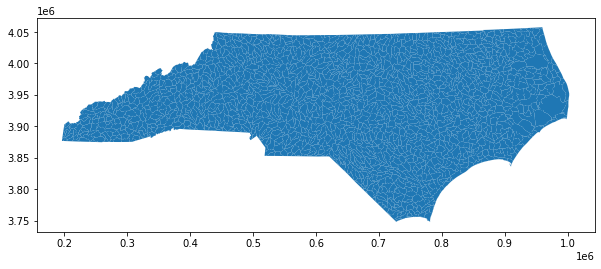

In [13]:
#Simple plot - does it look different than above? 
gdfUTM.plot(figsize=(10,5));

### 5. Exploring the `geometry` objects in a GeoPandas dataframe
The key to Geopandas ability to work with geospatial data is by adding a new data type to the standard Pandas dataFrame: this is stored in the `geometry` field. Let's explore this field. 

Complete documentation on the geometry object is here: http://geopandas.org/geometric_manipulations.html

In [14]:
#show the first 5 values in the geometry field: this is actually a GeoSeries...
gdfUTM['geometry'][0:5]

0    MULTIPOLYGON (((741602.285 3753931.597, 741439...
1    MULTIPOLYGON (((776236.604 3753807.429, 776351...
2    POLYGON ((767552.903 3755767.133, 767602.539 3...
3    POLYGON ((736123.640 3762835.350, 736098.184 3...
4    POLYGON ((763591.407 3760324.330, 763649.263 3...
Name: geometry, dtype: geometry

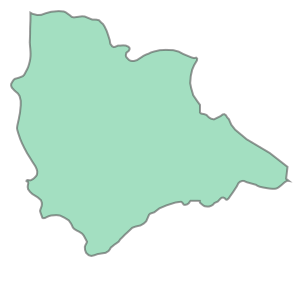

In [15]:
#show just a single geometry - it appears as a shape
gdfUTM['geometry'][10]

Now let's save that one geometry object, a polygon in this case to variable and examine what GeoPandas allows us to do with it. 

In [16]:
#Extract one feature geometry to a variable; what is its datatype?
thePoly = gdfUTM['geometry'][10]
type(thePoly)

shapely.geometry.polygon.Polygon

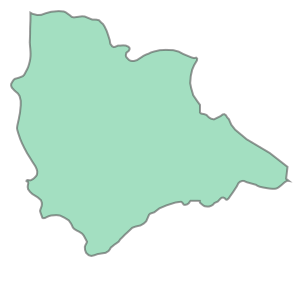

In [17]:
#Show thePoly
thePoly

In [18]:
#Show the area and perimeter length of ths polygon
theArea = thePoly.area
thePerim = thePoly.length
print ("Area (m2):",int(theArea))
print ("Permeter (m):",int(thePerim))

Area (m2): 33492168
Permeter (m): 28440


In [19]:
#Convert the polygon's boundary to a linestring (i.e. a line feature)
theBoundary = thePoly.boundary
type(theBoundary)

shapely.geometry.linestring.LineString

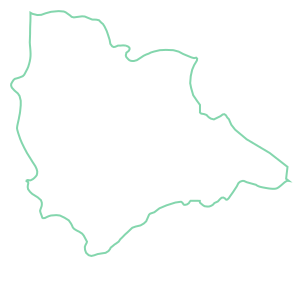

In [20]:
#Show the linestring - we see it as a line feature, as expected
theBoundary

In [21]:
#Create the centroid of the feature
theCentroid = thePoly.centroid
type(theCentroid)

shapely.geometry.point.Point

In [22]:
#Display the centroid - it doesn't appear because the x and y values are too large
[theCentroid]

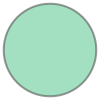

In [23]:
#But we can show the point buffered 10 m
theCentroid.buffer(10)

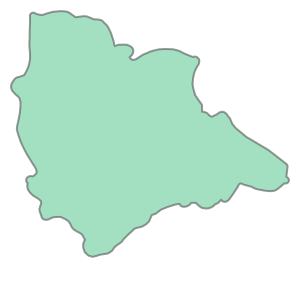

In [24]:
#We can buffer polygons too
thePoly.buffer(100)

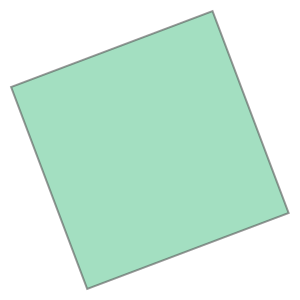

In [27]:
thePoly.minimum_rotated_rectangle

#### To try:
1. Display the polygon's perimeter (e.g. `theBoundary` object) bufferd by 250 meters.
2. What happens if you buffer `thePoly`  **-250m**?

In [ ]:
#See if you can display the boundary line created above, buffered 250 meters


In [ ]:
#Display the polygon buffered negative 250m


→ Geopandas has other [feature transformations](http://geopandas.org/geometric_manipulations.html?highlight=buffer#constructive-methods). Try: `convex_hull`, `envelope`, `simplify(tolerance=100)`...

In [ ]:
#What does the `.convex_hull` transformation do?

In [ ]:
#What does the `.envelope` transformation do?

In [ ]:
#Simplify the polygon using various tolerance values

### 6. Spatial Analysis among geometries
Let's move on to more sophisticated spatial analysis that we can do with GeoPandas. First we'll look at working with GeoSeries objects, i.e. arrays of geometries. Just as we can perform mathematical operations on sets of numbers stored in a Panda series or Numpy array, we can run spatial analyses on entire collections of geometries.

#### Subset features using Pandas `query`
First, we'll subset our data to a more manageable size dataset. For this we use Pandas queries. 

In [28]:
#Remind ourselves what columns are in this dataset
gdfUTM.columns

Index(['FID', 'HUC_8', 'HUC_10', 'HUC_12', 'ACRES', 'HU_10_NAME', 'HU_12_NAME',
       'META_ID', 'STATES', 'Basin', 'Dig_8', 'DWQ_Basin', 'geometry'],
      dtype='object')

In [29]:
#List unique values in the Basin field
gdfUTM['DWQ_Basin'].unique()

array(['Lumber', 'Cape Fear', 'White Oak', 'Yadkin Pee Dee', 'Neuse',
       'Tar-Pamlico', 'Catawba', 'Pasquotank', 'Roanoke', 'French Broad',
       'Little Tennessee', 'Broad', 'Savannah', 'Chowan', 'New',
       'Watauga', 'Hiwassee'], dtype=object)

In [30]:
#Create a dataframe of HUCs in the particular basin
gdfNeuse = gdfUTM.query('DWQ_Basin == "Neuse"').copy(deep=True)
gdfNeuse.shape

(190, 13)

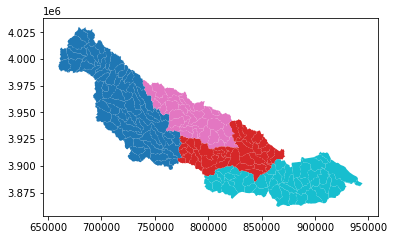

In [31]:
#Quick plot - adding "column=" allows us to color on unique values in that column
gdfNeuse.plot(column='HUC_8');

#### Computing distances between features
How far is each HUC in the Neuse from Durham? To do this we first have to create a point representing Durham. We do this using the Shapely package: https://shapely.readthedocs.io/en/stable/manual.html#points. However, to match the projection of our Neuse dataframe, we need to project our point to UTM Zone 17N. We do this with the `pyproj` package.

In [32]:
#Create a point for Durham (Lat=36.0044;Long=-78.9429)
from shapely.geometry import Point
ptDurham_DD = Point(-78.9429,36.0044)
type(ptDurham_DD)

shapely.geometry.point.Point

In [33]:
#Project Durham from NAD83 decimal degrees to UTM Zone 17n (WKID=26917)
import pyproj
prjNAD83 = pyproj.Proj(4326)
prjUTM17N = pyproj.Proj(26917)
ptDurham_UTM = Point(pyproj.transform(prjNAD83,       #Source projection
                                      prjUTM17N,      #Destination projection
                                      ptDurham_DD.x,  #X coordinate
                                      ptDurham_DD.y)) #Y coordinate
#Show the coordinates
ptDurham_UTM.x,ptDurham_UTM.y

C:\Users\jpfay\AppData\Local\ESRI\conda\envs\env859_2\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  


(1603797.0549006304, -10564017.96059808)

In [ ]:
#Looking at the warning above, redo the analysis using the updated method...
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:4326","epsg:26917")
x,y = transformer.transform(ptDurham_DD.x,ptDurham_DD.y)
ptDurham_UTM = Point(x,y)
x,y

In [34]:
#Compute the distance of each feature to this center point & show the mean
theDistances_km = gdfUTM.distance(ptDurham_UTM)/1000
#This returns a series -- a list of distances to each catchment feature
type(theDistances_km)

pandas.core.series.Series

In [35]:
theDistances_km[:5]

0    14342.727359
1    14336.158542
2    14343.431878
3    14346.582465
4    14344.181727
dtype: float64

In [36]:
#Summary stats of all the distances
theDistances_km.describe()

count     1767.000000
mean     14525.526681
std         70.783275
min      14335.575349
25%      14479.982320
50%      14532.288399
75%      14580.700517
max      14655.001350
dtype: float64

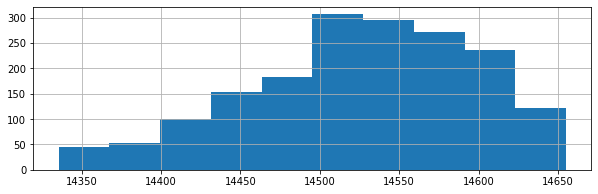

In [37]:
#Plot a histogram of values
theDistances_km.hist(figsize=(10,3));

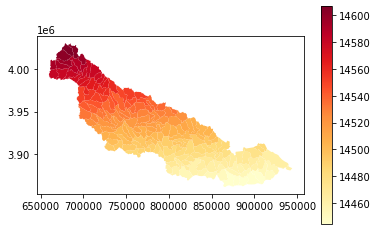

In [38]:
#We can even join the distances back to the geo dataframe and plot HUCs on distance
gdfNeuse['dist2durham'] = theDistances_km
gdfNeuse.plot(column='dist2durham',
              cmap='YlOrRd',
              legend=True);

#### Buffering all features
What if we wanted to find the "core area" of all our Neuse HUCS, i.e. all area within 1500m of its border. We can do that easily by buffering our features with a negative value:

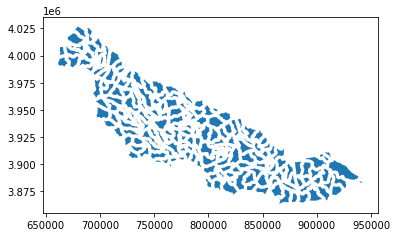

In [39]:
#Buffer the HUCs -1500m
gdfNeuseCore = gdfNeuse.buffer(-1500)
gdfNeuseCore.plot();

In [40]:
#Report summary stats of the areas of the returned features
gdfNeuseCore.area.describe()

count    1.900000e+02
mean     2.594903e+07
std      2.272818e+07
min      1.008105e+05
25%      1.063077e+07
50%      1.933047e+07
75%      3.616430e+07
max      2.075359e+08
dtype: float64

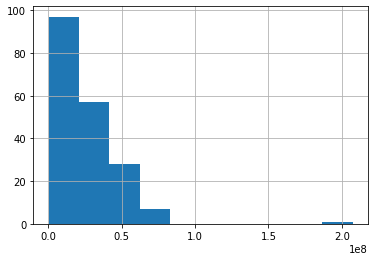

In [41]:
#Reveal a histogram of the areas
gdfNeuseCore.area.hist();

#### Clipping features
Now let's see what the area of each HUC is within 5000m of Durham...

In [42]:
#Buffer Durham 1500m 
durham_5000m = ptDurham_UTM.buffer(15000)
type(durham_5000m)

shapely.geometry.polygon.Polygon

In [43]:
#Add that one geometry feature to a new geoseries 
gs_Durham = gpd.GeoSeries(durham_5000m)
type(gs_Durham)

geopandas.geoseries.GeoSeries

In [44]:
#Create a one-item spatial dataframe and assign it's geometry to the geoseries above 
gdf_Durham = gpd.GeoDataFrame([{'Location':'Durham'}],
                              geometry=gs_Durham)
type(gdf_Durham)

geopandas.geodataframe.GeoDataFrame

In [45]:
#Show the dataframe. How's it look?
gdf_Durham

,Location,geometry
0,Durham,"POLYGON ((1618797.055 -10564017.961, 1618724.8..."


In [47]:
#What is the geodataframes coordinate reference system?
print(gdf_Durham.crs)

None


In [48]:
#As it's undefined, we'll define it - using the same crs as the Neuse datasets
gdf_Durham.crs = gdfNeuse.crs
print(gdf_Durham.crs)

epsg:26917


In [49]:
gs_Neuse = gdfNeuse.geometry
type(gs_Neuse)

geopandas.geoseries.GeoSeries

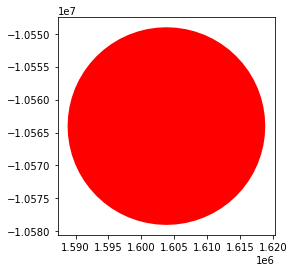

In [52]:
gdf_Durham.plot(color='red')  ;

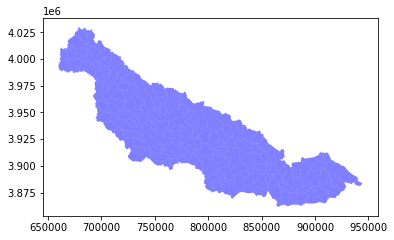

In [53]:
gdfNeuse.plot(color='blue',alpha=0.5);

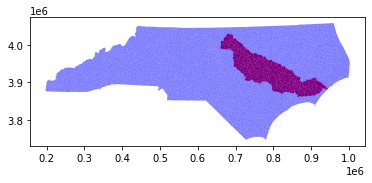

In [55]:
#Plot both dataframes
theAxis = gdfNeuse.plot(color='red')             #Plot the Durham gdf, saving its axis to "theAxis"
gdfUTM.plot(ax=theAxis,color='blue',alpha=0.5);  #Plot the Neuse gdf, using the same axis as above

In [ ]:
#Clip the HUC layer
gdfNeuseClip = gpd.overlay(gdf_Durham,gdfNeuse,how='intersection')
#Show the Clip
gdfNeuseClip.plot()

In [ ]:
#Extract each polygon's area to a new fields
gdfNeuseClip['Area'] = gdfNeuseClip.area
#Set the dataframe's index to the HUC12 Name
gdfNeuseClip.set_index('HU_12_NAME',inplace=True)
gdfNeuseClip.head()

In [ ]:
gdfNeuseClip['Area'].plot(kind='barh');

### A more complex analyis
Here we will buffer the centroid of a feature and then intersect that with the feature. 

* We begin by selecting a feature. We'll pick on the Elk Creek HUC...

In [ ]:
#Select a feature by an attribute
hucMask = gdfUTM['HU_12_NAME'] == 'Elk Creek'
gdfHUC = gdfUTM[hucMask]
type(gdfHUC)

In [ ]:
#Show the results
gdfHUC

►This approach is slightly different than in the above example (`thePoly = gdfUTM['geometry'][0]`) which returned a _Shapely geometry_ object from the geodataframe; here our query returns a _GeoSeries_ object. However, other than plotting, the behavior is mostly the same.

In [ ]:
#Get the shape of the feature
feature_geometry = gdfHUC['geometry'] #->returns a GeoSeries, not a shapely geometry
type(feature_geometry)

In [ ]:
#Copy the dfHUC dataframe and then we'll modify geometries
gdfHUC_copy = gdfHUC.copy(deep=True)

In [ ]:
#Update geometry to the centroid of each feature buffered 5000m
gdfHUC_copy['geometry'] = gdfHUC_copy['geometry'].centroid.buffer(5000)

In [ ]:
#Buffer the centroid
theBuffer = theCentroid.buffer(100)
#Intersect the buffer and the original shape
theClip = gpd.overlay(gdfHUC_copy,gdfHUC,how='intersection')
#Show the Clip
theClip.plot()

## 7. Geospatial capabilities of the GeoPandas dataFrame object

In [ ]:
#Dissolving
dfHUC8 = gdf.dissolve(by='HUC_8',aggfunc='sum')
dfHUC8.dtypes

In [ ]:
dfHUC8.plot(column='ACRES',
            scheme='quantiles',        
            figsize=(14,18));

## Recap
In this super quick introduction to GeoPandas, we saw that the GeoDataFrame is easy to construct from a shapefile, and once constructed gives us access to the analytic capability of Pandas dataframes (e.g. selecting, summarizing, etc.) as well as plotting and spatial analytic capability. 

I'm hopeful that at the end of this short introduction you're eager to read up on the documentation and learn more what GeoPandas can do. 